In [2]:
import pandas as pd 
import numpy as np
import math 
import string

In [3]:
df=pd.read_csv('data\S&P 500 Historical Data.csv')
df.drop(columns='Vol.',inplace=True)
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(ascending=True,inplace=True)
df

,Price,Open,High,Low,Change %
Date,,,,,
1970-02-01,89.50,89.50,89.50,89.50,5.29%
1970-03-01,89.60,89.60,89.60,89.60,0.11%
1970-04-01,81.50,81.50,81.50,81.50,-9.04%
1970-05-01,76.50,76.50,76.50,76.50,-6.13%
1970-06-01,72.70,72.70,72.70,72.70,-4.97%
...,...,...,...,...,...
2023-12-01,"4,769.80","4,559.40","4,793.30","4,546.50",4.42%
2024-01-01,"4,845.60","4,745.20","4,931.10","4,682.10",1.59%
2024-02-01,"5,096.30","4,861.10","5,111.10","4,853.50",5.17%


In [4]:
df.isna().value_counts()
df.duplicated().value_counts()

False    651
dtype: int64

In [5]:
df['High']=df['High'].str.replace(',','').astype(float)
df['Low']=df['Low'].str.replace(',','').astype(float)
df['Open']=df['Open'].str.replace(',','').astype(float)
df['Price']=df['Price'].str.replace(',','').astype(float)
df['Change %']=df['Change %'].str.replace('%','').astype(float)


In [6]:
df['Change %']=df['Change %']/100

In [7]:
df.index.freq=pd.infer_freq(df.index)

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def normalize_data(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns,index=df.index)
    return df_normalized

def standardize_data(df):
    scaler = StandardScaler()
    df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df_standardized
def difference_data(df):
    df_diff = df.diff().dropna()
    return df_diff
def log_transform_data(df):
    df_log = np.log(df + 1)
    return df_log

def invert_differencing(pred_diff, original_series):
    pred_original = np.zeros_like(pred_diff)
    pred_original[0] = original_series[-len(pred_diff) - 1] + pred_diff[0]
    for i in range(1, len(pred_diff)):
        pred_original[i] = pred_original[i - 1] + pred_diff[i]
    return pred_original

In [9]:
snp100_normalized=normalize_data(df)

In [10]:
snp100_normalized

,Price,Open,High,Low,Change %
Date,,,,,
1970-02-01,0.005009,0.005009,0.004999,0.005207,0.709153
1970-03-01,0.005028,0.005028,0.005018,0.005227,0.573302
1970-04-01,0.003468,0.003468,0.003461,0.003605,0.333333
1970-05-01,0.002504,0.002504,0.002499,0.002603,0.409651
1970-06-01,0.001772,0.001772,0.001769,0.001842,0.440073
...,...,...,...,...,...
2023-12-01,0.906644,0.866124,0.909332,0.897803,0.686336
2024-01-01,0.921247,0.901917,0.935825,0.924959,0.612116
2024-02-01,0.969543,0.924245,0.970431,0.959285,0.706006


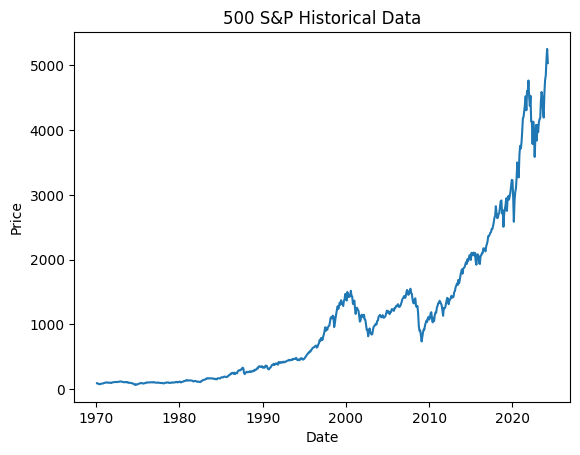

In [11]:
import matplotlib.pyplot as plt
plt.plot(df['Price'])
plt.title('500 S&P Historical Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [12]:
df.describe()

,Price,Open,High,Low,Change %
count,651.000000,651.000000,651.000000,651.000000,651.000000
mean,1081.234393,1074.285146,1110.878694,1037.384132,0.007279
std,1153.315910,1144.876298,1184.730249,1104.959491,0.044298
min,63.500000,63.500000,63.500000,63.500000,-0.217500
25%,159.650000,158.150000,163.050000,151.400000,-0.018000
50%,786.200000,757.100000,814.900000,733.500000,0.010000
75%,1406.700000,1403.550000,1439.550000,1348.250000,0.035800
max,5254.400000,5254.330000,5264.900000,5056.800000,0.163800


In [13]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Open'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 3.675211
p-value: 1.000000


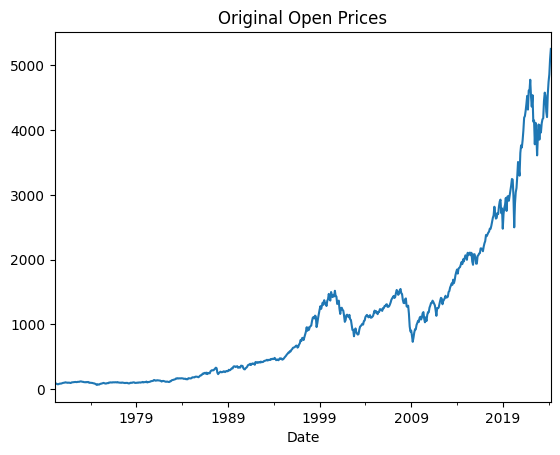

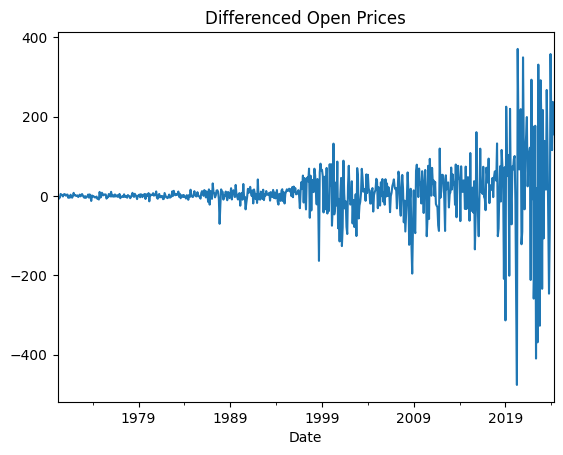

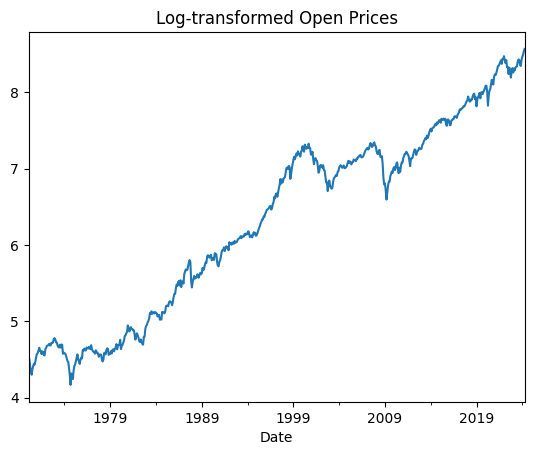

In [14]:
# Plot the original time series
df['Open'].plot(title='Original Open Prices')
plt.show()

# Apply differencing to make the series stationary
df_diff = df['Open'].diff().dropna()

# Plot the differenced series
df_diff.plot(title='Differenced Open Prices')
plt.show()

# Apply log transformation
df_log = np.log(df['Open'] + 1)

# Plot the log-transformed series
df_log.plot(title='Log-transformed Open Prices')
plt.show()


In [15]:
# Perform the ADF test on the original series
adf_test_original = adfuller(df['Open'])
print('ADF Statistic (Original): %f' % adf_test_original[0])
print('p-value (Original): %f' % adf_test_original[1])

# Perform the ADF test on the differenced series
adf_test_diff = adfuller(df_diff)
print('ADF Statistic (Differenced): %f' % adf_test_diff[0])
print('p-value (Differenced): %f' % adf_test_diff[1])

# Perform the ADF test on the log-transformed series
adf_test_log = adfuller(df_log)
print('ADF Statistic (Log-transformed): %f' % adf_test_log[0])
print('p-value (Log-transformed): %f' % adf_test_log[1])

ADF Statistic (Original): 3.675211
p-value (Original): 1.000000
ADF Statistic (Differenced): -5.249182
p-value (Differenced): 0.000007
ADF Statistic (Log-transformed): 0.140347
p-value (Log-transformed): 0.968710


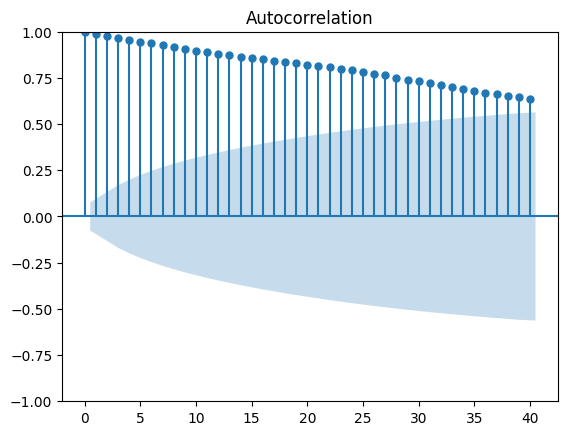

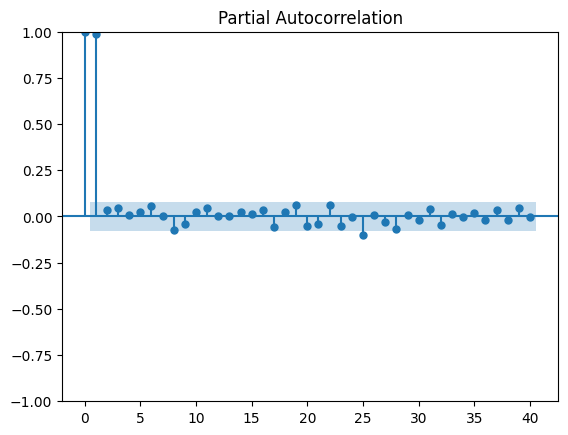

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Open'],lags=40)
plot_pacf(df['Open'],lags=40)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  650
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -3791.847
Date:                Fri, 17 May 2024   AIC                           7589.694
Time:                        16:13:22   BIC                           7603.120
Sample:                    03-01-1970   HQIC                          7594.902
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7400      0.014    -54.572      0.000      -0.767      -0.713
ar.L2         -0.4054      0.014    -28.560      0.000      -0.433      -0.378
sigma2      6969.7988    137.423     50.718      0.0

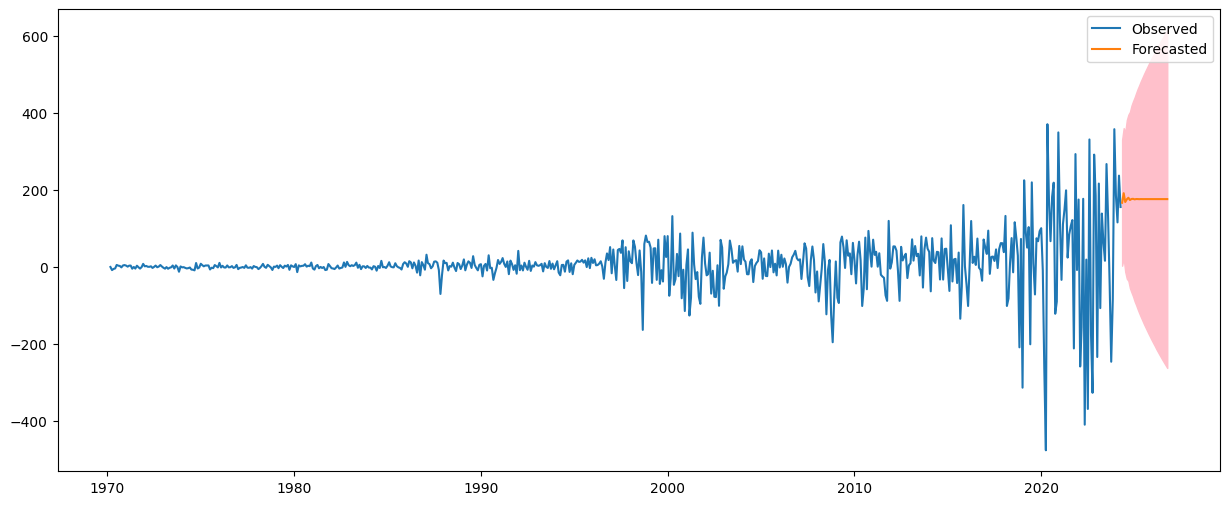

In [17]:
from statsmodels.tsa.arima.model import ARIMA
df_diff = df['Open'].diff().dropna()


model_arima = ARIMA(df_diff, order=(2, 1, 0)) 
model_fit_arima = model_arima.fit()

print(model_fit_arima.summary())


forecast = model_fit_arima.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

plt.figure(figsize=(15, 6))
plt.plot(df_diff.index, df_diff, label='Observed')
plt.plot(predicted_mean.index, predicted_mean, label='Forecasted')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink')
plt.legend()
plt.show()

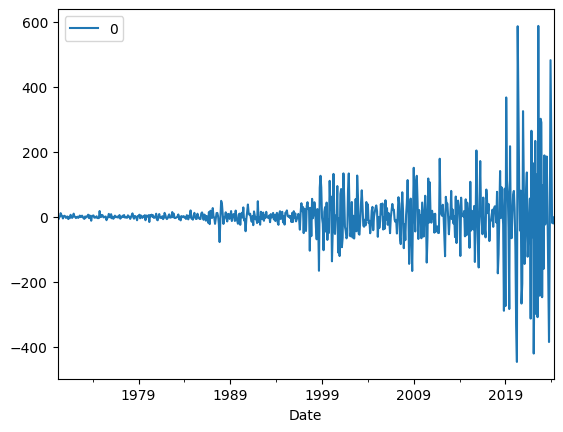

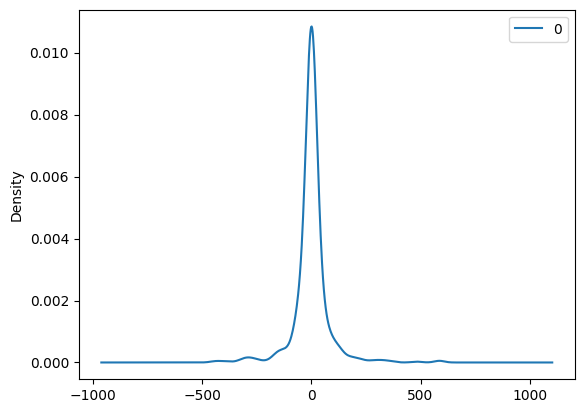

                0
count  650.000000
mean     0.584787
std     83.355399
min   -446.127289
25%    -12.190605
50%     -0.159567
75%     13.779268
max    586.930665


In [19]:
residuals = pd.DataFrame(model_fit_arima.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()

print(residuals.describe())

In [20]:
df_diff=df['Open'].diff().dropna()
# df_diff.fillna(df_diff.mean(),inplace=True)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

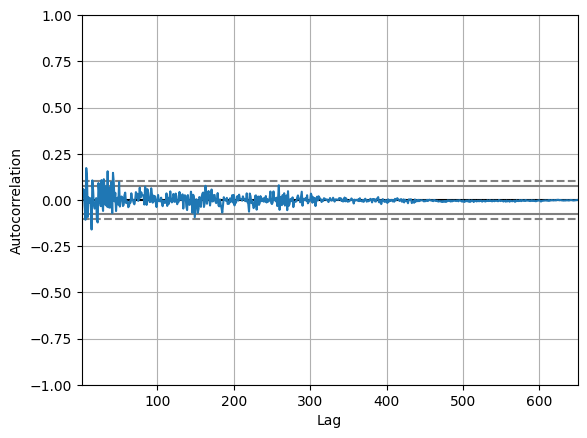

In [21]:
pd.plotting.autocorrelation_plot(df_diff)

In [22]:
from sklearn.metrics import mean_squared_error
train_size = int(len(df_diff) * 0.8)
train, test = df_diff[0:train_size], df_diff[train_size:len(df_diff)]

In [23]:
# train.sort_index(ascending=True)
# test.sort_index(ascending=True)

In [24]:
ar_model_train = ARIMA(train, order=(2, 1,0))
model_train_fit_arima = ar_model_train.fit()

In [25]:

test_forecast_arima=model_train_fit_arima.get_forecast(steps=(len(test)))

arr_test_forecast_series = pd.Series(test_forecast_arima.predicted_mean, index=test.index)

In [26]:
arr_test_forecast_series

Date
2013-07-01    41.233012
2013-08-01    34.622892
2013-09-01    35.756422
2013-10-01    37.744216
2013-11-01    36.091591
                ...    
2023-12-01    36.519580
2024-01-01    36.519580
2024-02-01    36.519580
2024-03-01    36.519580
2024-04-01    36.519580
Freq: MS, Name: predicted_mean, Length: 130, dtype: float64

In [27]:
mse = mean_squared_error(test, arr_test_forecast_series)
rmse = mse**0.5
print(mse,rmse)

21679.00214409026 147.23791000992327


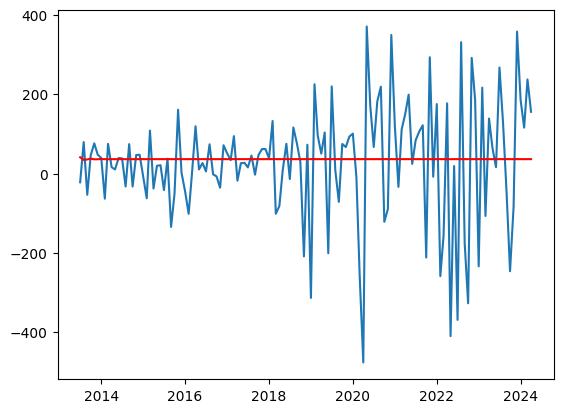

In [28]:
plt.plot(test)
plt.plot( arr_test_forecast_series, color='red')
plt.show()

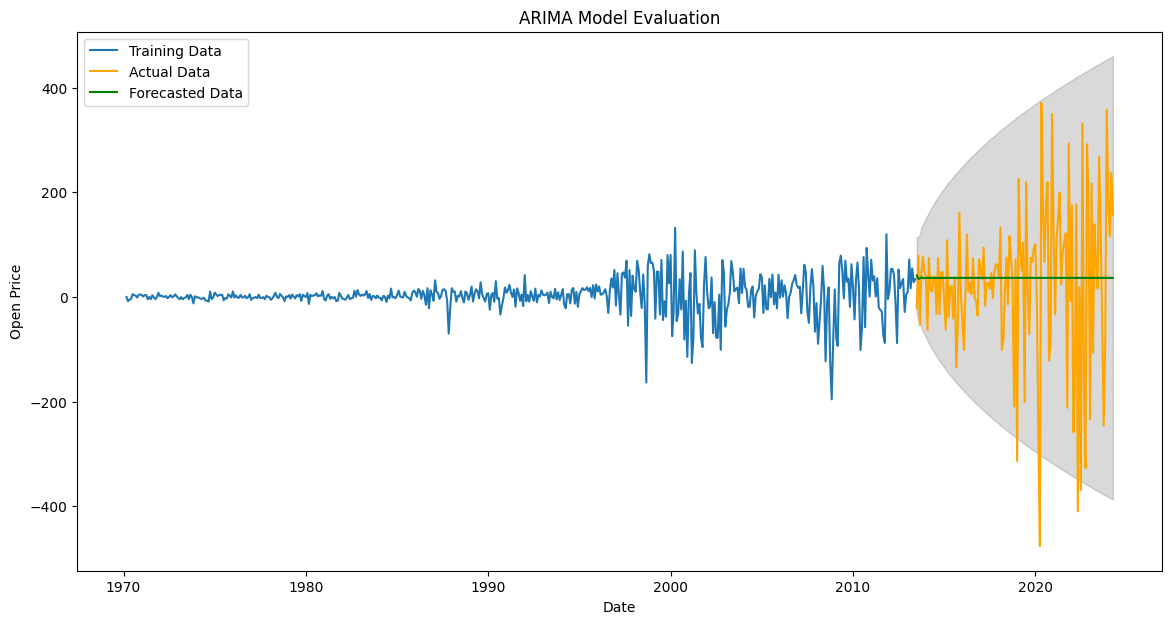

RMSE: 147.23791000992327


In [29]:
plt.figure(figsize=(14,7))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data', color='orange')
plt.plot(arr_test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast_arima.conf_int().iloc[:, 0], 
                 test_forecast_arima.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

print('RMSE:', rmse)

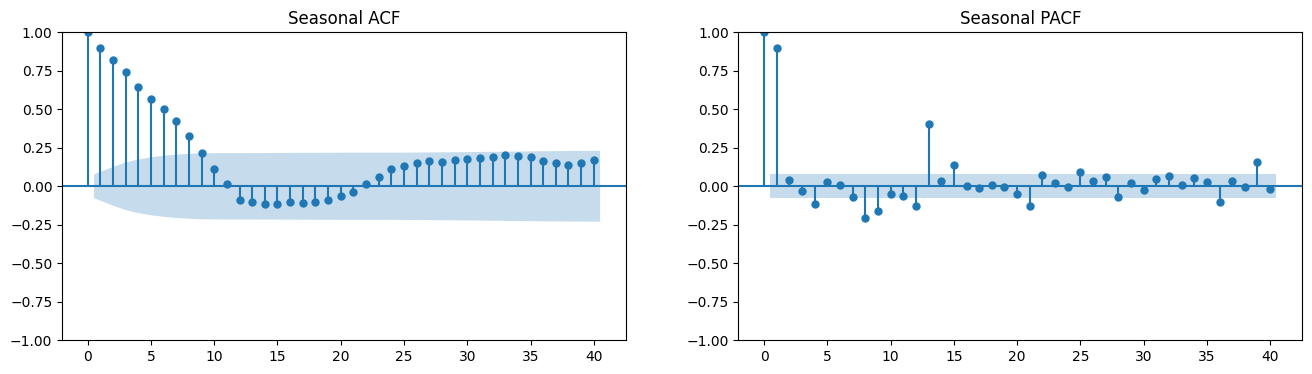

                                      SARIMAX Results                                       
Dep. Variable:                                 Open   No. Observations:                  651
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -3661.439
Date:                              Fri, 17 May 2024   AIC                           7332.878
Time:                                      16:15:16   BIC                           7355.170
Sample:                                  02-01-1970   HQIC                          7341.532
                                       - 04-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0894      0.016     -5.705      0.000      -0.120      -0.059
ar.L2         -0.02

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Seasonal differencing
seasonal_period = 12  # Example: monthly data with yearly seasonality
seasonal_diff = df['Open'].diff(seasonal_period).dropna()

# Identify seasonal components
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(seasonal_diff, lags=40, ax=axes[0])
axes[0].set_title('Seasonal ACF')
plot_pacf(seasonal_diff, lags=40, ax=axes[1])
axes[1].set_title('Seasonal PACF')
plt.show()

# Fit SARIMA model (example parameters: p=1, d=1, q=1, P=1, D=1, Q=1, seasonal period=12)
model = SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(1, 1, 1, seasonal_period))
model_fit = model.fit(disp=False)

# Model summary
print(model_fit.summary())


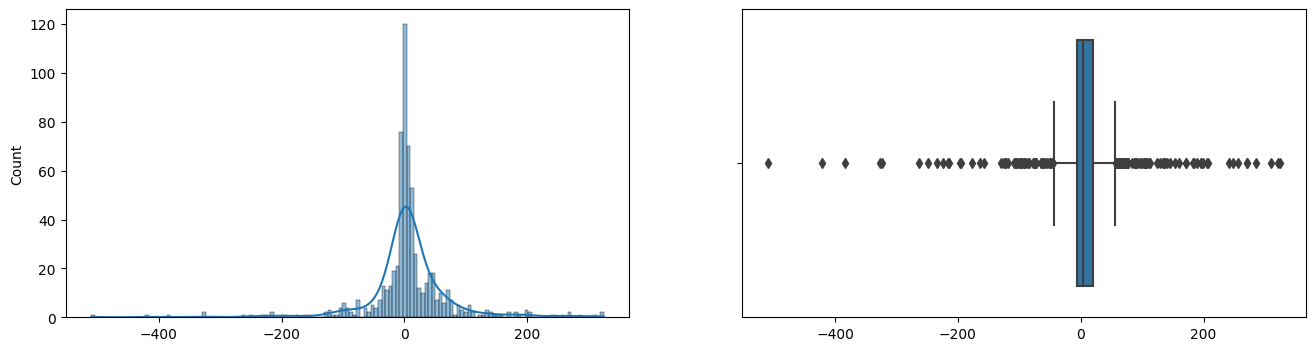

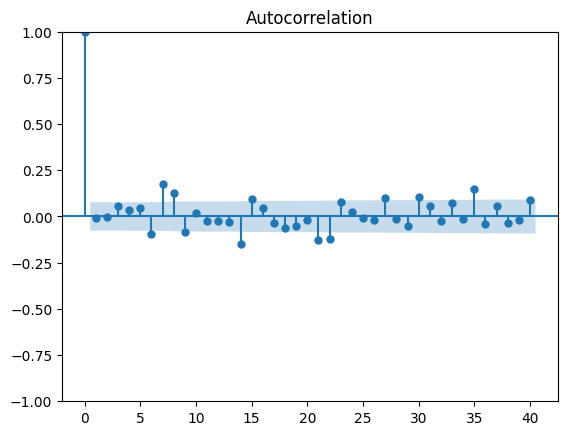

2024-05-01    5250.716911
2024-06-01    5254.204873
2024-07-01    5258.118788
2024-08-01    5279.230872
2024-09-01    5276.250734
2024-10-01    5258.164693
2024-11-01    5273.468089
2024-12-01    5302.501835
2025-01-01    5312.769301
2025-02-01    5318.678897
2025-03-01    5318.623305
2025-04-01    5329.894211
Freq: MS, Name: predicted_mean, dtype: float64


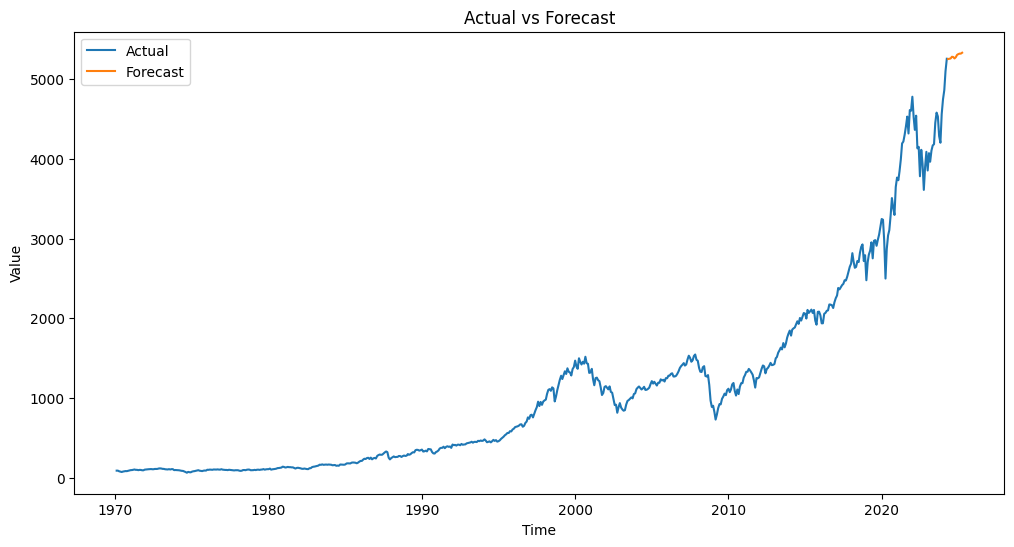

In [32]:
import seaborn as sns
# Plot residuals
residuals = model_fit.resid
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.histplot(residuals, kde=True, ax=ax[0])
sns.boxplot(x=residuals, ax=ax[1])
plt.show()

# ACF plot of residuals
plot_acf(residuals, lags=40)
plt.show()

# Forecast
forecast = model_fit.forecast(steps=12) 
print(forecast)


plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [258]:
scaler=MinMaxScaler()
normaldf= pd.DataFrame(scaler.fit_transform(df), columns=df.columns,index=df.index)
# Split the data into training and test sets
train_size = int(len(normaldf) * 0.8)
train, test = normaldf[0:train_size], normaldf[train_size:len(normaldf)]

# Create sequences for the neural network
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length].values)
        y.append(data.iloc[i + seq_length].values)
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train, seq_length)
X_test, y_test = create_sequences(test, seq_length)


In [295]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(seq_length, X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(170, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(X_train.shape[2]))  # Output layer matches number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), callbacks=[early_stop])
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 10, 200)           164800    
                                                                 
 dropout_68 (Dropout)        (None, 10, 200)           0         
                                                                 
 lstm_70 (LSTM)              (None, 170)               252280    
                                                                 
 dropout_69 (Dropout)        (None, 170)               0         
                                                                 
 dense_111 (Dense)           (None, 5)                 855       
                                                                 
Total params: 417935 (1.59 MB)
Trainable params: 417935 (1.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
11/11 

4/4 [==============================] - 0s 10ms/step - loss: 0.0053
Test Loss: 0.005321783479303122


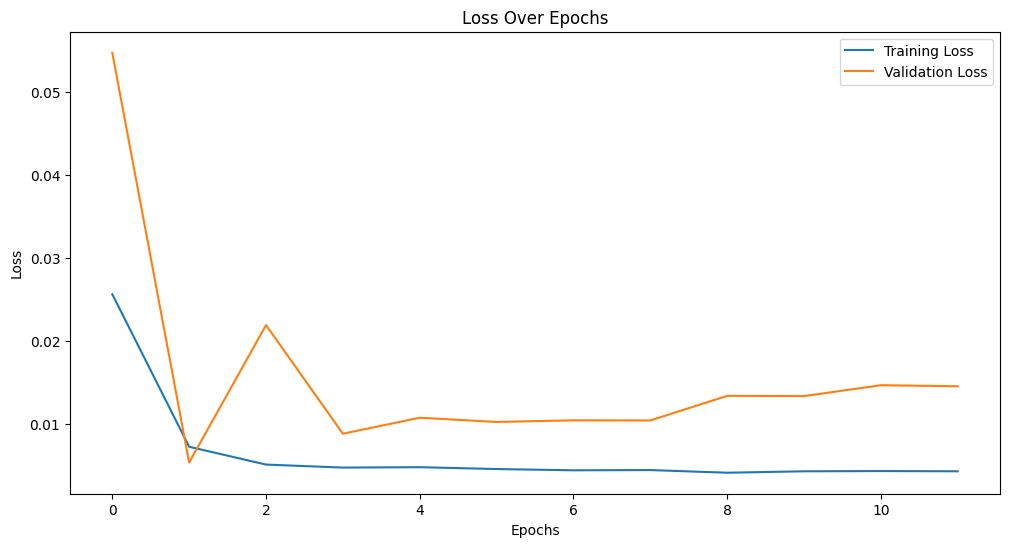

In [296]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


4/4 [==============================] - 0s 9ms/step


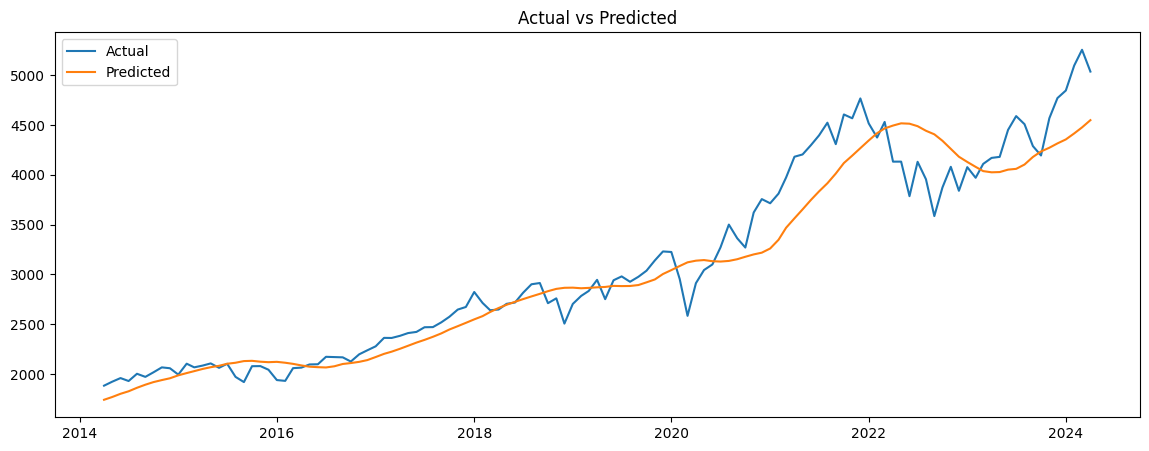

Train MSE: 0.003884499194100499
Test MSE: 0.005321783479303122


In [297]:

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling of predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Inverse scaling of actual values
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the predictions against the actual values for one of the features
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + seq_length:], y_test_inv[:, 0], label='Actual')
plt.plot(df.index[train_size + seq_length:], test_predictions[:, 0], label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')

In [298]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_inv, test_predictions)
mae = mean_absolute_error(y_test_inv, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, test_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 67506.12496677139
Mean Absolute Error (MAE): 177.59758201580163
Root Mean Squared Error (RMSE): 259.8194083719909
R-squared (R2) Score: 0.7129288488171437


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 169804.8438
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 169644.1562
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 169206.7812
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 167934.1562
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 164313.1406
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 157036.8125
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 140480.7656
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 111891.3906
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 87509.7812
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 79431.4766
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 74550.4531
Epoch 12/100
11/11 [==============================] - 0s 3ms/step 

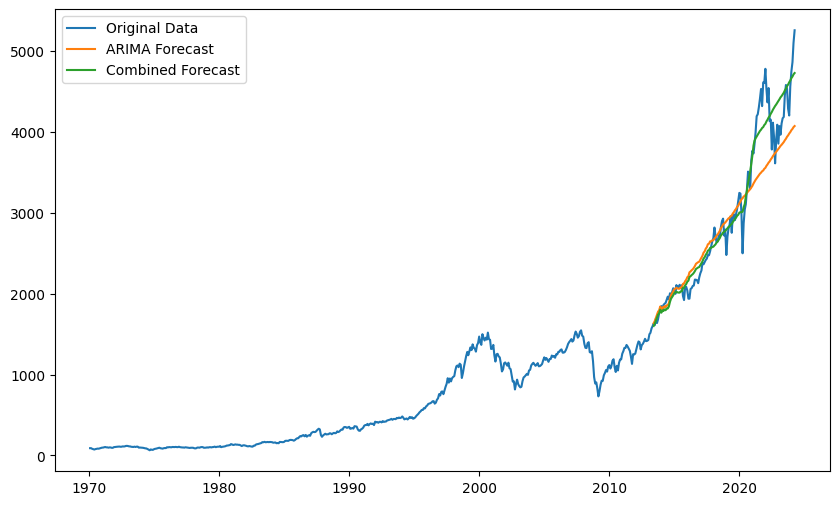

In [161]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data=df['Open']
# Split data into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model on the training set
arima_order = (50, 2, 1)
arima_model = ARIMA(train, order=arima_order)
arima_fit = arima_model.fit()

# Forecast using ARIMA model
arima_forecast = arima_fit.forecast(steps=len(test))
arima_residuals = test - arima_forecast

# Prepare features for ANN (ARIMA forecast as input)
X = arima_forecast.values.reshape(-1, 1)
y = arima_residuals.values

# Split into training and test sets for ANN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the ANN model
ann_model = Sequential([
    Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=1)

# Predict residuals using ANN
ann_residuals_pred = ann_model.predict(scaler.transform(X))

# Combine ARIMA and ANN predictions for the final forecast
final_forecast = arima_forecast.values + ann_residuals_pred.flatten()

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Original Data')
plt.plot(test.index, arima_forecast.values, label='ARIMA Forecast')
plt.plot(test.index[:len(final_forecast)], final_forecast, label='Combined Forecast')
plt.legend()
plt.show()


In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(test.values, final_forecast)
mae = mean_absolute_error(test.values, final_forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test.values, final_forecast)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 47783.686557144436
Mean Absolute Error (MAE): 156.30041001640993
Root Mean Squared Error (RMSE): 218.59479993161878
R-squared (R2) Score: 0.9498139282293495
